In [32]:
# PHYS309 - HW2
# Michael Kaehler

import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import math

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

Recall that in PHYS 207, you were often asked to plot displacement as a function of time. For example, for a baseball thrown directly upward you would plot $y(t)$, and for a block on a horizontal spring you would plot $x(t)$. Here we will examine how the displacement and time axes "scissor together" at relativistic speeds.

Imagine that frame $K^{\prime}$ is moving in the $+x$ direction at speed $v$ relative to frame $K$. You are at rest in frame $K$. Let's figure out how the set of $(t^{\prime},x^{\prime})$ axes would look to you when the frames' origins $O$ and $O^{\prime}$ coincide.

<ol>
    <li>Use the fact that $x^{\prime} = 0$ on the $t^{\prime}$ axis to define a line $x(t)$ in frame $K$ that follows the $t^{\prime}$ axis. Write a function that computes points on the line. $v$ will be one of your function inputs.</li>
</ol>

In [33]:
# Function takes inputs for velocity v, and time t. Outputs points on x(t) that follows the t' axis.
def t_prime_trace(v,t):
    
    # Start with lorentz transform of x'=gamma(x-vt), plug in x' = 0 and solve for x.
    t_prime_trace = v*t
    return t_prime_trace

<ol start=2>
    <li>Use the fact that $t^{\prime} = 0$ on the $x^{\prime}$ axis to define a line $x(t)$ that traces the $x^{\prime}$ axis in frame $K$. Write a second function that computes points on this line.</li>
</ol>

In [34]:
# Function takes inputs for velocity v, and time t. Outputs points on x(t) that follows the x' axis.
def x_prime_trace(v,t):
    
    c = 3.0e8
    
    # Start with lorentz transform of t'=gamma(t-vx/c^2), plug in t' = 0 and solve for x.
    x_prime_trace = (t*(c**2))/(v)
    return x_prime_trace

<ol start=3>
    <li>The code below creates a figure with centered $(ct,x)$ axes that have range $(-10^{10}, 10^{10})$. We are using $ct$ instead of just $t$ on our horizontal axis so that both axes have the same units. Use your functions from problems 1 and 2 to overplot the $t^{\prime}$ and $x^{\prime}$ axes <strong>as a function of $ct$</strong> for $v = 0.2c$. Make your $t^{\prime}$ and $x^{\prime}$ axes red, and label them in red.</li>
</ol>

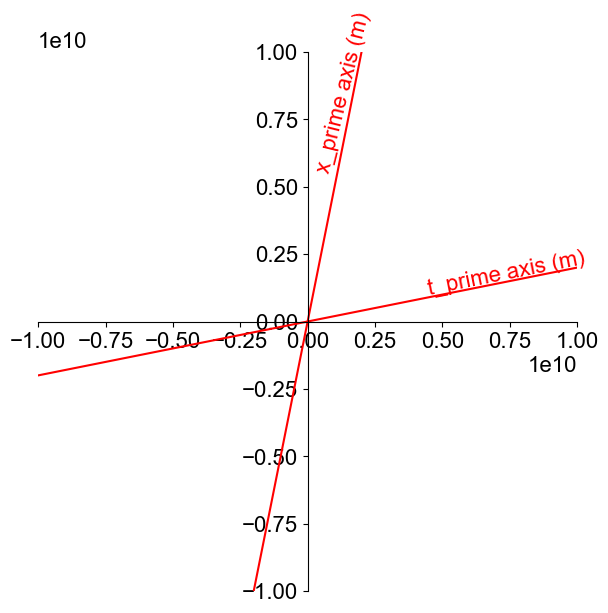

In [81]:
# Set up an array of independent variables t that spans -100 to 100 seconds
t = np.linspace(0, 200, num=201, endpoint=True) - 100

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# YOUR CODE HERE: Use ax.plot() to plot the t' and x' axes below
c = 3.0e8
# v = 0.2c, given in problem.
v = 0.2*c

# Function callouts using the t and v defined a few lines ago.
X_axis = x_prime_trace(v,t)
T_axis = t_prime_trace(v,t)

# Plot x' and t' axes in red.
ax.plot(t*c,X_axis,color="red")
ax.plot(t*c,T_axis,color="red")

# Move the left and bottom "spines" (borders of the plot) to the center
# This makes a math textbook-like set of (x,t) axes instead of a box around the plot
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# Rotate angle
angle1 = 10
angle2 = 81
l1 = np.array((0.45e10,0.1e10))
l2 = np.array((0.08e10,0.55e10))

# YOUR CODE HERE: Use ax.text() to add RED labels to the t' and x' axes below

# Both axes have a horizontal of c*t (rate*time), so they would be in a distance unit (meters).
# I'm sure there is a better way of adding labels, but this was something I figured out how to do.
x_label = ax.text(*l1, 't_prime axis (m)', fontsize=16,
              rotation=angle1, rotation_mode='anchor',
              transform_rotates_text=True, color="red")

t_label = ax.text(*l2, 'x_prime axis (m)', fontsize=16,
              rotation=angle2, rotation_mode='anchor',
              transform_rotates_text=True, color="red")

<ol start=4>
    <li>Make a figure that plots $t^{\prime}$ and $x^{\prime}$ axes for $v = 0.25c$, $v = 0.5c$, and $v = 0.75c$. Use different colors for each pair of axes. Make a legend that shows which value of $v$ corresponds to each color.</li>
</ol>

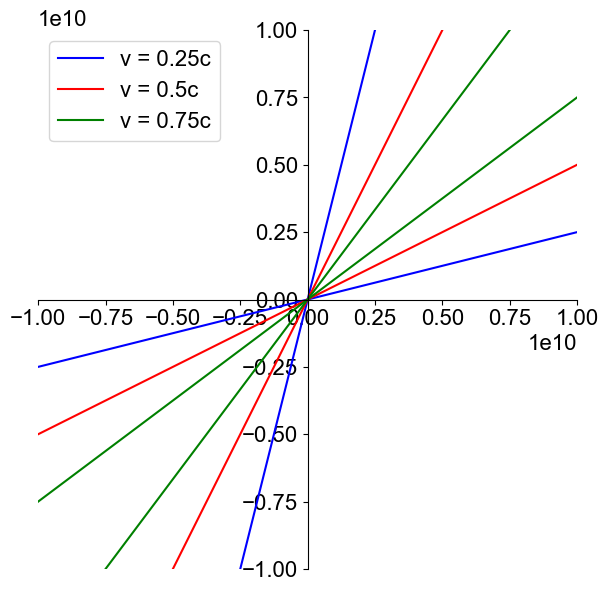

In [85]:
# Set up an array of independent variables t that spans -100 to 100 seconds
t = np.linspace(0, 200, num=201, endpoint=True) - 100

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

#Same thing I did in problem 3, only this time we call the functions multiple times for three different v values.

c = 3.0e8

v1 = 0.25*c
v2 = 0.5*c
v3 = 0.75*c

# Function callouts for each axes.
X1 = x_prime_trace(v1,t)
T1 = t_prime_trace(v1,t)
X2 = x_prime_trace(v2,t)
T2 = t_prime_trace(v2,t)
X3 = x_prime_trace(v3,t)
T3 = t_prime_trace(v3,t)

# Plot axes in blue, red, and green.
x_plot_1 = ax.plot(t*c,X1,color="blue",label='v = 0.25c')
t_plot_1 = ax.plot(t*c,T1,color="blue")
x_plot_2 = ax.plot(t*c,X2,color="red",label='v = 0.5c')
t_plot_2 = ax.plot(t*c,T2,color="red")
x_plot_3 = ax.plot(t*c,X3,color="green",label='v = 0.75c')
t_plot_3 = ax.plot(t*c,T3,color="green")

# Move the left and bottom "spines" (borders of the plot) to the center
# This makes a math textbook-like set of (x,t) axes instead of a box around the plot
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# YOUR CODE HERE:
ax.legend()

# I didn't add axes labels as I thought they might be hard to read on this graph.

<ol start=5>
    <li>Connect your graph from problem 4 with the discussion of world lines in Chapter 2 of your textbook. What kind of world line do your $(t^{\prime}, x^{\prime})$ axes approach as $v \rightarrow c$? Create a similar plot to problem 4, but this time plot $(t^{\prime}, x^{\prime})$ axes for $v = 0.5, 0.75, 0.875, 0.9375$. To illustrate the concept of taking a limit as $v \rightarrow c$, make each set of $(t^{\prime}, x^{\prime})$ axes a successively darker shade of gray. Plot the limiting world line in black. Add a legend to show which value of $v$ corresponds to which shade of gray. You may find it helpful to specify line colors like this: <tt>color='0.7'</tt>.</li>
</ol>

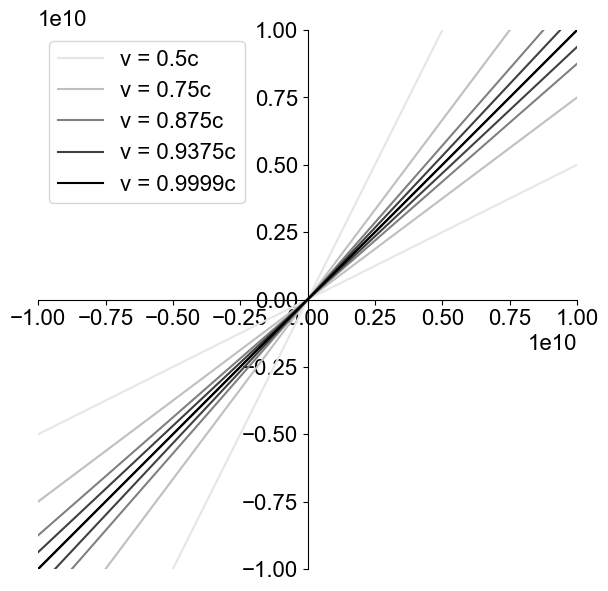

In [88]:
# Set up an array of independent variables t that spans -100 to 100 seconds
t = np.linspace(0, 200, num=201, endpoint=True) - 100

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# Again same thing as before, only we have more v values. I can see from problem 4 that the trend seems to show
# that the axes are merging closer and closer together. I'm curious what will happen when v=1?

c = 3.0e8

v1 = 0.5*c
v2 = 0.75*c
v3 = 0.875*c
v4 = 0.9375*c
v5 = 1*c

# Function callouts for each axes.
X1 = x_prime_trace(v1,t)
T1 = t_prime_trace(v1,t)
X2 = x_prime_trace(v2,t)
T2 = t_prime_trace(v2,t)
X3 = x_prime_trace(v3,t)
T3 = t_prime_trace(v3,t)
X4 = x_prime_trace(v4,t)
T4 = t_prime_trace(v4,t)
X5 = x_prime_trace(v5,t)
T5 = t_prime_trace(v5,t)

# Plot axes in different shades of gray with v=1 axes colored in black. Looks like when v=1, the axes merge together
# and make a 45 degree line. This happens when v would equal c which we know is not possible.
x_plot_1 = ax.plot(t*c,X1,color="0.9",label='v = 0.5c')
t_plot_1 = ax.plot(t*c,T1,color="0.9")
x_plot_2 = ax.plot(t*c,X2,color="0.75",label='v = 0.75c')
t_plot_2 = ax.plot(t*c,T2,color="0.75")
x_plot_3 = ax.plot(t*c,X3,color="0.5",label='v = 0.875c')
t_plot_3 = ax.plot(t*c,T3,color="0.5")
x_plot_4 = ax.plot(t*c,X4,color="0.25",label='v = 0.9375c')
t_plot_4 = ax.plot(t*c,T4,color="0.25")
x_plot_5 = ax.plot(t*c,X5,color="black",label='v = 0.9999c')
t_plot_5 = ax.plot(t*c,T5,color="black")

# Move the left and bottom "spines" (borders of the plot) to the center
# This makes a math textbook-like set of (x,t) axes instead of a box around the plot
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# YOUR CODE HERE: Use ax.text() to add RED labels to the t' and x' axes below
ax.legend()